### **Sentiment Analysis of Product Reviews**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

Data Loading

In [ ]:
df=pd.read_csv("/content/amazon.csv")

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

3.Detecting Missing values

In [ ]:
df.isnull()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1461,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1462,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1463,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
df.loc[df["rating_count"].isnull(), 'rating_count'] = df["rating_count"].mode()[0]

In [ ]:
df["discounted_price"] = df["discounted_price"].apply(lambda x : x.replace("₹",""))
df["actual_price"] =  df["actual_price"].apply(lambda x : x.replace("₹",""))

df["discounted_price"] = df["discounted_price"].apply(lambda x : x.replace(",",""))
df["actual_price"] =  df["actual_price"].apply(lambda x : x.replace(",",""))
df["rating_count"] = df['rating_count'].apply(lambda x : x.replace(",",""))
df["discount_percentage"] = df["discount_percentage"].apply(lambda x : x.replace("%",""))

In [ ]:
columns_to_convert = [
    'discounted_price',
    'actual_price',
    'discount_percentage',
    'rating',
    'rating_count'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.loc[df['rating'].isnull(), 'rating']= df['rating'].mode()[0]

In [ ]:
df['category'] = df['category'].str.split("|").str.get(0)
df['product_type'] = df['category'].str.split("|").str.get(-1)
df['total_sales'] = df['actual_price'] * df['rating_count']
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,product_type,total_sales
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,26671631.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,15353906.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,15055272.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,65959737.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,6745095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen,379.0,919.0,59,4.0,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,1001710.0
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen,2280.0,3045.0,25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://

Describing the Statistics

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count,total_sales
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3125.310874,5444.990635,47.691468,4.096587,18283.367235,8.283000e+07
std,6944.304394,10874.826864,21.635905,0.291574,42725.921124,2.369510e+08
min,39.000000,39.000000,0.000000,2.000000,2.000000,1.673000e+03
25%,325.000000,800.000000,32.000000,4.000000,1191.000000,1.454471e+06
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000,8.589270e+06
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000,5.012553e+07
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000,3.451882e+09


Machine Learning

This code trains a Random Forest model to perform regression using Scikit-learn.

train_test_split it Splits dataset into training & testing sets.
RandomForestRegressor	Machine Learning model is used for regression tasks.
LabelEncoder it	encodes categorical variables into numeric format.
mean_squared_error it measures the error predictions.
r2_score	evaluates the accuracy of  model.
Numpy	handles numerical operations.



Initialised the Random forest model.
Next trained the model and made predictions on it. evaluated the model accuracy and performamce.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = df[['product_type', 'rating', 'rating_count', 'discount_percentage', 'actual_price', 'total_sales']]
df = df.dropna()

label_encoder = LabelEncoder()
df['product_type'] = label_encoder.fit_transform(df['product_type'])

# Define the features (X) and target variable (y)
X = df[['product_type', 'rating', 'rating_count', 'discount_percentage','actual_price']]  # Features
y = df['total_sales']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model (you can try other models as well)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using MSE, RMSE, and R² score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the accuracy metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 1.052904810062472e+16
Root Mean Squared Error (RMSE): 102611149.98198159
R² Score: 0.8775344978003868


Visualization

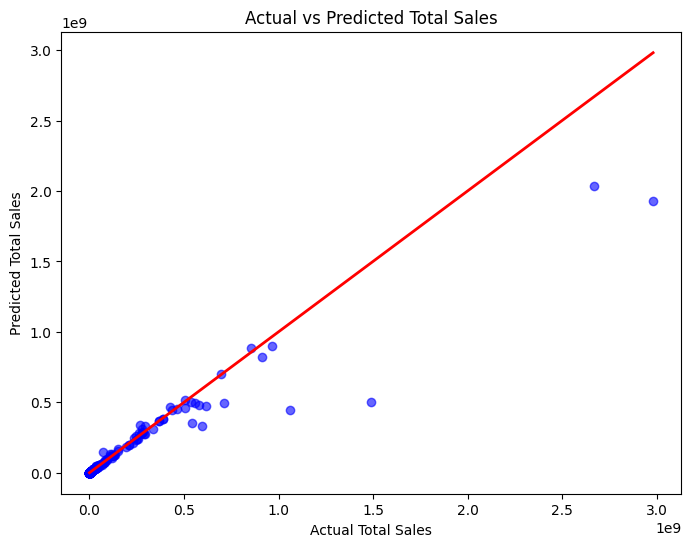

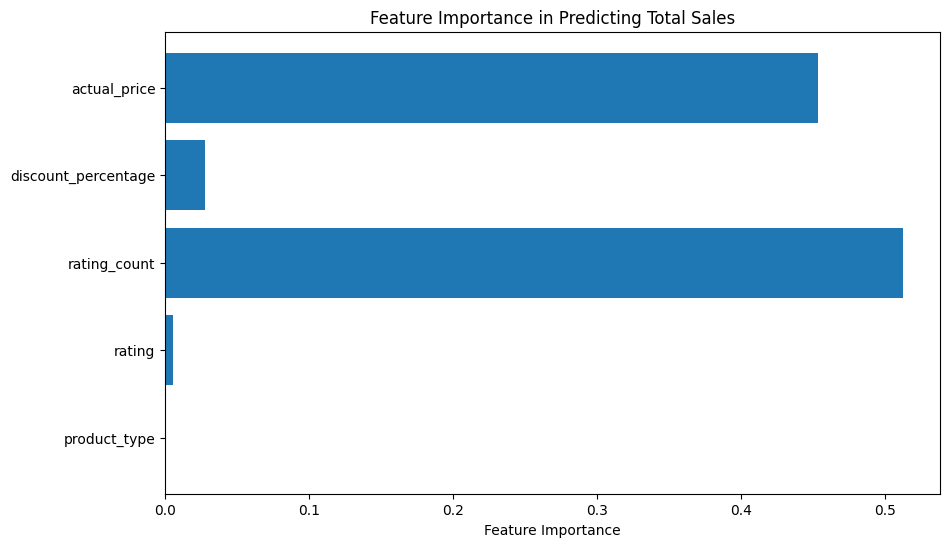

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.show()

# Feature Importance Analysis (to see which features are most important for the model)
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Total Sales')
plt.show()

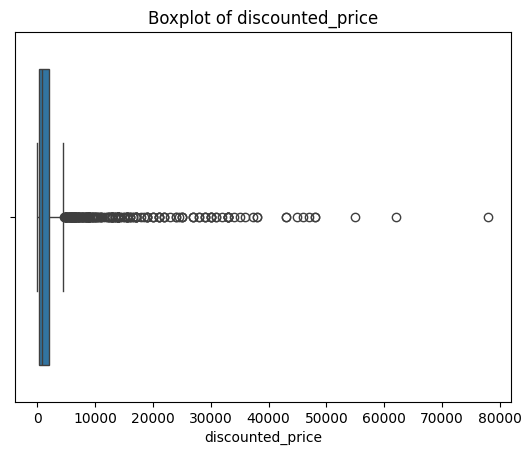

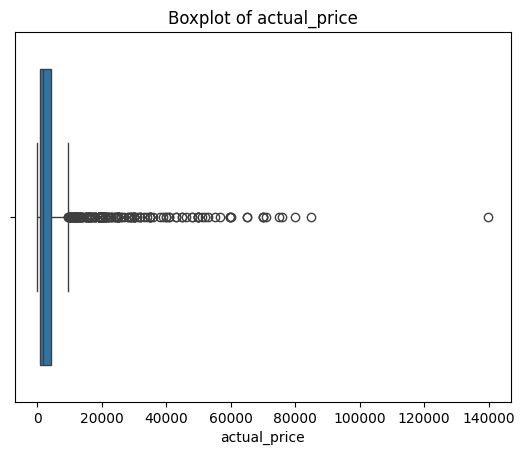

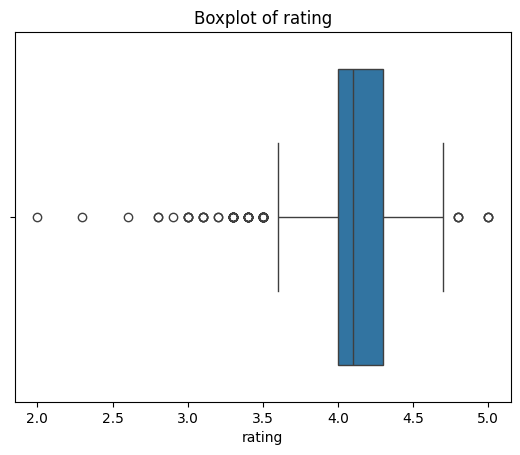

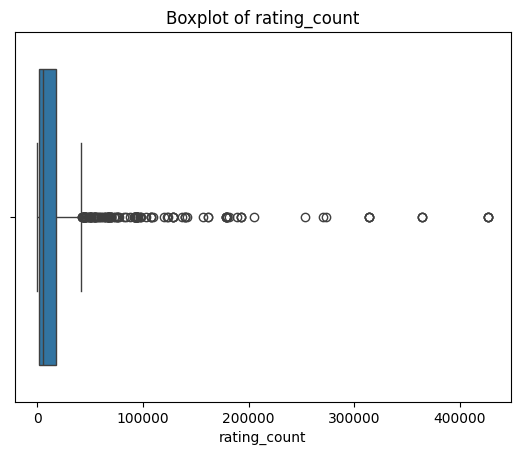

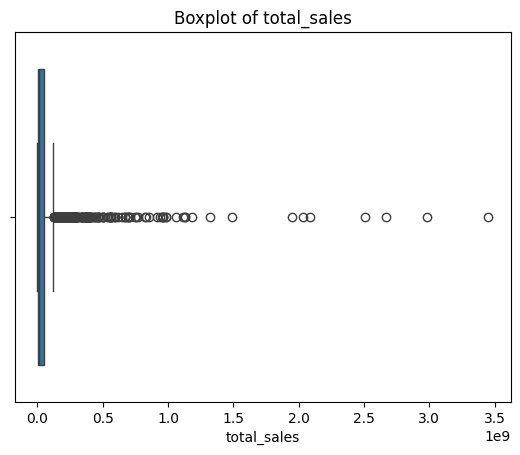

In [ ]:
for column in ['discounted_price', 'actual_price', 'rating', 'rating_count', 'total_sales']:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

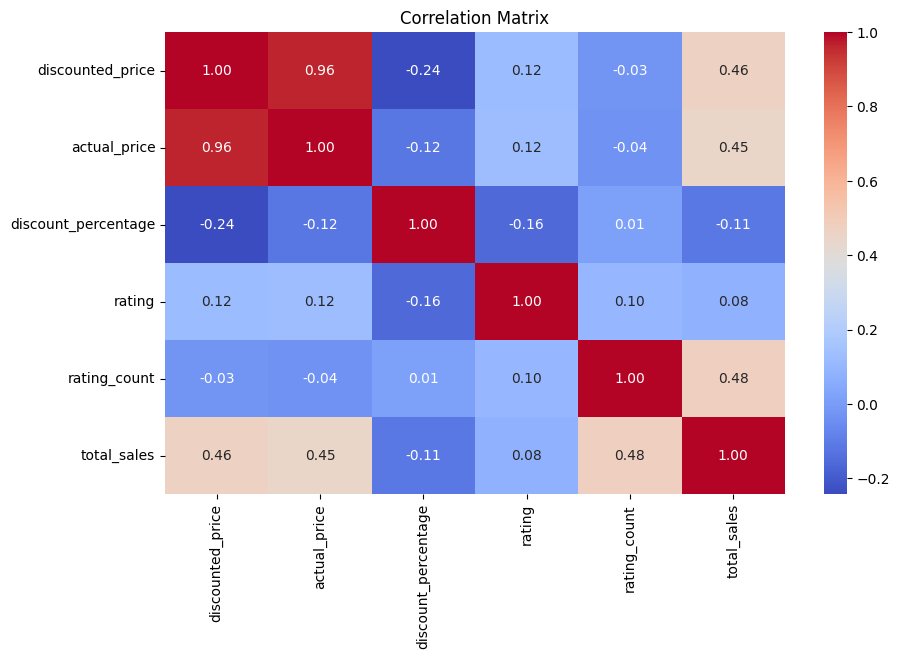

In [ ]:
numeric_columns = [
    'discounted_price',
    'actual_price',
    'discount_percentage',
    'rating',
    'rating_count',
    'total_sales'
]
df_corr = df[numeric_columns]
correlation_matrix = df_corr.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<ipython-input-27-e910e5640c23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='product_type', palette="tab10")


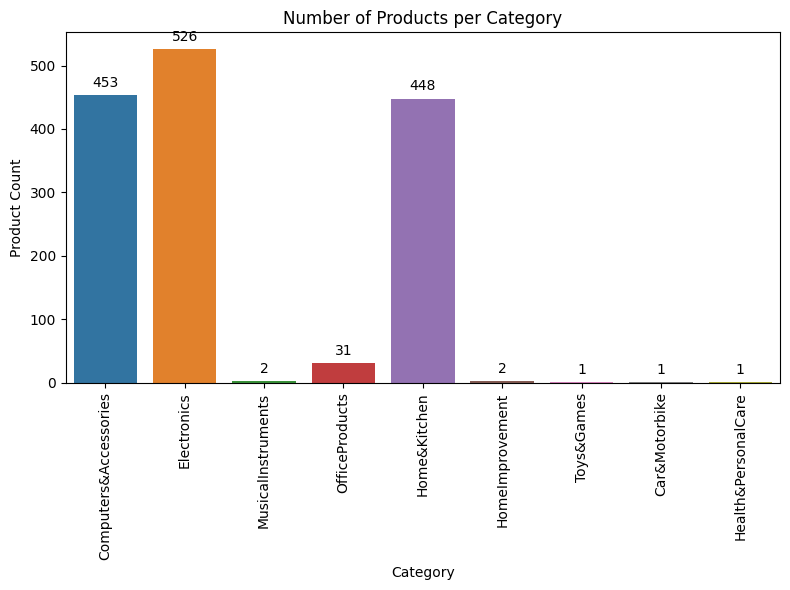

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='product_type', palette="tab10")
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.tight_layout()
plt.show()

This is the scatter plot between the actual price and the rating.

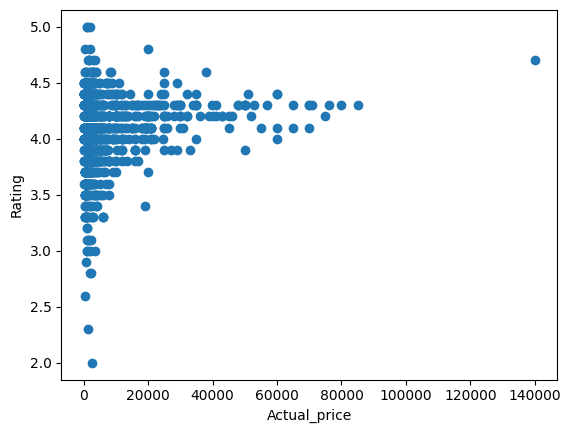

In [ ]:
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

Implementing a Natural Language Processing (NLP) techniques

This code builds an LSTM-based deep learning model for sentiment analysis on Amazon reviews.

import re – For regular expressions, used to clean text
from nltk.corpus import stopwords – To remove common words that don’t add much meaning.
from nltk.tokenize import word_tokenize – To split text into words (tokenization).
from nltk.sentiment import SentimentIntensityAnalyzer – To perform pre-trained sentiment analysis using VADER(a pre-trained sentiment analysis tool in NLTK)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

Load the preprocessed dataset.

In [6]:
import pandas as pd
df=pd.read_csv("/content/amazon_cleaned.csv")

Pandas & NumPy – For data manipulation.
TensorFlow/Keras – To build the deep learning model.
Tokenizer & pad_sequences – For text preprocessing.
train_test_split – To split the dataset into training and testing sets.
classification_report – To evaluate model performance.

In [7]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Assigning the Sentiment Labels as
Ratings > 3 → Positive Sentiment (1)
Ratings ≤ 3 → Negative Sentiment (0).
Instead of binary (0 or 1), we can classify Positive, Neutral, and Negative


In [9]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1458  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1459  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1460  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1461  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1462  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             39

Tokenization is used to Convert words into numerical tokens.
Sequences that Maps each word to a unique integer.
Padding - Ensures all reviews have a fixed length (100 words) by adding padding where needed.

In [11]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
print(padded_sequences)

[[ 115  315   51 ...    0    0    0]
 [   9  346   12 ...   20   11   35]
 [  15  141  315 ...    0    0    0]
 ...
 [ 233   14  681 ...   11    7    8]
 [   9   24  467 ...    0    0    0]
 [   6  108    6 ...   87 1433 2382]]


Split Data into Training & Testing Sets like 80% training and 20% testing split.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)


Embedding Layer it Converts word tokens into a  vector.
LSTM Layers:
First LSTM returns sequences.
Second LSTM processes sequences.
Dropout Layers it helps prevent overfitting.
As Dense Layer,Sigmoid Activation that outputs a probability.

In [15]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compiling the model using the loss function as it is a binary crossentropy problem, in optimizer adam is used faster learning of data and metrics in aacuracy is used.

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.9389 - loss: 0.3010 - val_accuracy: 0.9932 - val_loss: 0.0430
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.9950 - loss: 0.0323 - val_accuracy: 0.9932 - val_loss: 0.0418
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.9931 - loss: 0.0401 - val_accuracy: 0.9932 - val_loss: 0.0411
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9964 - loss: 0.0240 - val_accuracy: 0.9932 - val_loss: 0.0410
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.9949 - loss: 0.0321 - val_accuracy: 0.9932 - val_loss: 0.0408
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.99      1.00      1.00       291

    accuracy                           0.99       293
   macro avg       0.50      0.50      0.50       293
weighted avg       0.99      0.99      0.99      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Since text classification is a supervised learning task, we evaluate our models using classification metrics.